In [54]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from helpers import (get_training_observations, 
                     get_training_labels, 
                     get_protein_proportions)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import heatmap
from mlxtend.plotting import plot_decision_regions

In [26]:
x_train = get_training_observations()
y_train = get_training_labels()

Getting all training observations from 'metagenome_classification.db'...
Getting all training labels from 'metagenome_classification.db'...


In [27]:
x_train.isna().sum()

index
PF00001.19    0
PF00002.22    0
PF00003.20    0
PF00004.27    0
PF00005.25    0
             ..
PF17221.1     0
PF17222.1     0
PF17223.1     0
PF17224.1     0
PF17225.1     0
Length: 16306, dtype: int64

In [71]:
x_train.shape

(1249, 16306)

In [40]:
y_train.head(5)

index,EMPO_1,EMPO_2,EMPO_3
0,Free-living,Saline,Hypersaline (saline)
1,Free-living,Saline,Water (saline)
2,Host-associated,Plant,Plant rhizosphere
3,Free-living,Non-saline,Soil (non-saline)
4,Free-living,Saline,Water (saline)


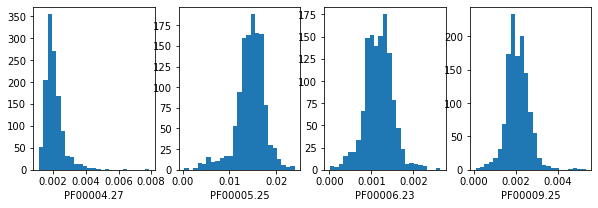

In [29]:
columns = [ 'PF00004.27','PF00005.25', 'PF00006.23','PF00009.25']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for idx, ax in enumerate(axes.flatten()):
    # plot histogram
    ax.hist(x_train[columns[idx]], bins = 25)
    # set xlabel
    ax.set_xlabel(columns[idx])

In [38]:
y_train_unique = y_train.groupby(['EMPO_1', 'EMPO_2','EMPO_3']).agg(Total = ('EMPO_3', 'count'))
df1 = y_train.groupby(['EMPO_1']).agg(Total = ('EMPO_1', 'count'))
df2 = y_train.groupby(['EMPO_1', 'EMPO_2']).agg(Total = ('EMPO_2', 'count'))
y_train_unique

Total
EMPO_1          EMPO_2     EMPO_3                        
Free-living     Non-saline Aerosol (non-saline)         8
                           Sediment (non-saline)       73
                           Soil (non-saline)          303
                           Subsurface (non-saline)    144
                           Surface (non-saline)         5
                           Water (non-saline)         245
                Saline     Hypersaline (saline)        15
                           Sediment (saline)           14
                           Surface (saline)             6
                           Water (saline)             290
Host-associated Animal     Animal corpus                4
                           Animal proximal gut         39
                Plant      Plant corpus                 1
                           Plant rhizosphere           96
                           Plant surface                6

In [46]:
x_train_col_sum = x_train.sum(axis=0)
x_train_col_sum.values
count = np.count_nonzero(x_train_col_sum.values)
x_train_col_sum.sort_values(ascending=False).head(10)

index
PF00005.25    18.114111
PF00072.22    10.441123
PF02518.24     6.999755
PF00528.20     6.430814
PF00501.26     6.257992
PF00873.17     5.897754
PF07690.14     5.812666
PF00106.23     5.431637
PF00171.20     4.366591
PF13561.4      4.363936
dtype: float64

(array([   2.,    4.,   11.,   40.,  191.,  657., 1052.,  863.,  720.,
         810.,  915., 1046., 1152., 1061.,  917.,  796.,  774.,  842.,
         817.,  795.,  698.,  604.,  647.,  471.,  239.,  108.,   53.,
          16.,    3.,    2.]),
 array([-13.90701318, -13.3468897 , -12.78676621, -12.22664273,
        -11.66651925, -11.10639577, -10.54627229,  -9.98614881,
         -9.42602533,  -8.86590185,  -8.30577837,  -7.74565489,
         -7.18553141,  -6.62540793,  -6.06528445,  -5.50516096,
         -4.94503748,  -4.384914  ,  -3.82479052,  -3.26466704,
         -2.70454356,  -2.14442008,  -1.5842966 ,  -1.02417312,
         -0.46404964,   0.09607384,   0.65619732,   1.21632081,
          1.77644429,   2.33656777,   2.89669125]),
 <a list of 30 Patch objects>)

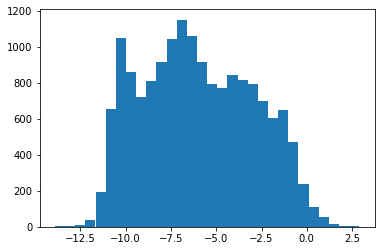

In [31]:
plt.hist(np.log(x_train_col_sum), bins=30)

In [32]:
column_count = []
for column_name in x_train.columns:
    column = x_train[column_name]
    # Get the count of non-Zeros values in column
    count_of_non_zeros = (column != 0).sum()
    column_count.append(count_of_non_zeros)


(array([4393., 1144.,  784.,  482.,  396.,  379.,  350.,  367.,  320.,
         313.,  221.,  186.,  195.,  137.,  133.,  125.,  107.,  125.,
         131.,  118.,  112.,  136.,  104.,  141.,  116.,  109.,  126.,
         114.,  114.,  119.,  109.,  118.,  136.,  122.,  116.,  127.,
         116.,  121.,  152.,  137.,  152.,  145.,  150.,  171.,  182.,
         199.,  222.,  280.,  353., 1601.]),
 array([1.00000e+00, 2.59600e+01, 5.09200e+01, 7.58800e+01, 1.00840e+02,
        1.25800e+02, 1.50760e+02, 1.75720e+02, 2.00680e+02, 2.25640e+02,
        2.50600e+02, 2.75560e+02, 3.00520e+02, 3.25480e+02, 3.50440e+02,
        3.75400e+02, 4.00360e+02, 4.25320e+02, 4.50280e+02, 4.75240e+02,
        5.00200e+02, 5.25160e+02, 5.50120e+02, 5.75080e+02, 6.00040e+02,
        6.25000e+02, 6.49960e+02, 6.74920e+02, 6.99880e+02, 7.24840e+02,
        7.49800e+02, 7.74760e+02, 7.99720e+02, 8.24680e+02, 8.49640e+02,
        8.74600e+02, 8.99560e+02, 9.24520e+02, 9.49480e+02, 9.74440e+02,
        9.99400e

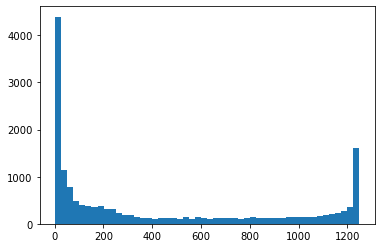

In [37]:
plt.hist((column_count), bins=50)

In [41]:
train_full = x_train.join(y_train)

In [62]:
train_vis = train_full.loc[:,['PF00005.25','PF00072.22','PF02518.24','PF00528.20','PF00501.26','PF00873.17','PF07690.14','PF00106.23','PF00171.20','PF13561.4','EMPO_3']]
train_vis

index,PF00005.25,PF00072.22,PF02518.24,PF00528.20,PF00501.26,PF00873.17,PF07690.14,PF00106.23,PF00171.20,PF13561.4,EMPO_3
0,0.006243,0.003150,0.002349,0.001318,0.000981,0.001192,0.001376,0.000862,0.000379,0.000621,Hypersaline (saline)
1,0.013739,0.005071,0.004148,0.005357,0.004334,0.001429,0.008269,0.003032,0.002755,0.003671,Water (saline)
2,0.016218,0.012313,0.007990,0.005386,0.006736,0.005929,0.005931,0.006072,0.004302,0.004431,Plant rhizosphere
3,0.019874,0.010829,0.007140,0.005831,0.007259,0.005950,0.003332,0.005474,0.004046,0.004046,Soil (non-saline)
4,0.012389,0.004943,0.003974,0.004310,0.005010,0.002226,0.003610,0.004775,0.003138,0.004779,Water (saline)
...,...,...,...,...,...,...,...,...,...,...,...
1244,0.002478,0.002303,0.001632,0.000938,0.000748,0.001200,0.000977,0.001200,0.000845,0.000943,Water (saline)
1245,0.015060,0.007745,0.005585,0.004423,0.005602,0.004341,0.004012,0.003598,0.003906,0.003006,Water (non-saline)
1246,0.016434,0.012119,0.008160,0.005418,0.005902,0.005607,0.007217,0.005844,0.004449,0.004146,Plant rhizosphere
1247,0.015320,0.014472,0.008454,0.004230,0.005455,0.009461,0.004661,0.005838,0.004254,0.003640,Soil (non-saline)


In [66]:
empo_3 = pd.get_dummies(train_vis.EMPO_3, prefix='EMPO_3')
train_vis = train_full.loc[:,['PF00005.25','PF00072.22','PF02518.24','PF00528.20','PF00501.26','PF00873.17','PF07690.14','PF00106.23','PF00171.20','PF13561.4']].join(empo_3)

In [67]:
train_vis

,PF00005.25,PF00072.22,PF02518.24,PF00528.20,PF00501.26,PF00873.17,PF07690.14,PF00106.23,PF00171.20,PF13561.4,...,EMPO_3_Plant rhizosphere,EMPO_3_Plant surface,EMPO_3_Sediment (non-saline),EMPO_3_Sediment (saline),EMPO_3_Soil (non-saline),EMPO_3_Subsurface (non-saline),EMPO_3_Surface (non-saline),EMPO_3_Surface (saline),EMPO_3_Water (non-saline),EMPO_3_Water (saline)
0,0.006243,0.003150,0.002349,0.001318,0.000981,0.001192,0.001376,0.000862,0.000379,0.000621,...,0,0,0,0,0,0,0,0,0,0
1,0.013739,0.005071,0.004148,0.005357,0.004334,0.001429,0.008269,0.003032,0.002755,0.003671,...,0,0,0,0,0,0,0,0,0,1
2,0.016218,0.012313,0.007990,0.005386,0.006736,0.005929,0.005931,0.006072,0.004302,0.004431,...,1,0,0,0,0,0,0,0,0,0
3,0.019874,0.010829,0.007140,0.005831,0.007259,0.005950,0.003332,0.005474,0.004046,0.004046,...,0,0,0,0,1,0,0,0,0,0
4,0.012389,0.004943,0.003974,0.004310,0.005010,0.002226,0.003610,0.004775,0.003138,0.004779,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,0.002478,0.002303,0.001632,0.000938,0.000748,0.001200,0.000977,0.001200,0.000845,0.000943,...,0,0,0,0,0,0,0,0,0,1
1245,0.015060,0.007745,0.005585,0.004423,0.005602,0.004341,0.004012,0.003598,0.003906,0.003006,...,0,0,0,0,0,0,0,0,1,0
1246,0.016434,0.012119,0.008160,0.005418,0.005902,0.005607,0.007217,0.005844,0.004449,0.004146,...,1,0,0,0,0,0,0,0,0,0
1247,0.015320,0.014472,0.008454,0.004230,0.005455,0.009461,0.004661,0.005838,0.004254,0.003640,...,0,0,0,0,1,0,0,0,0,0


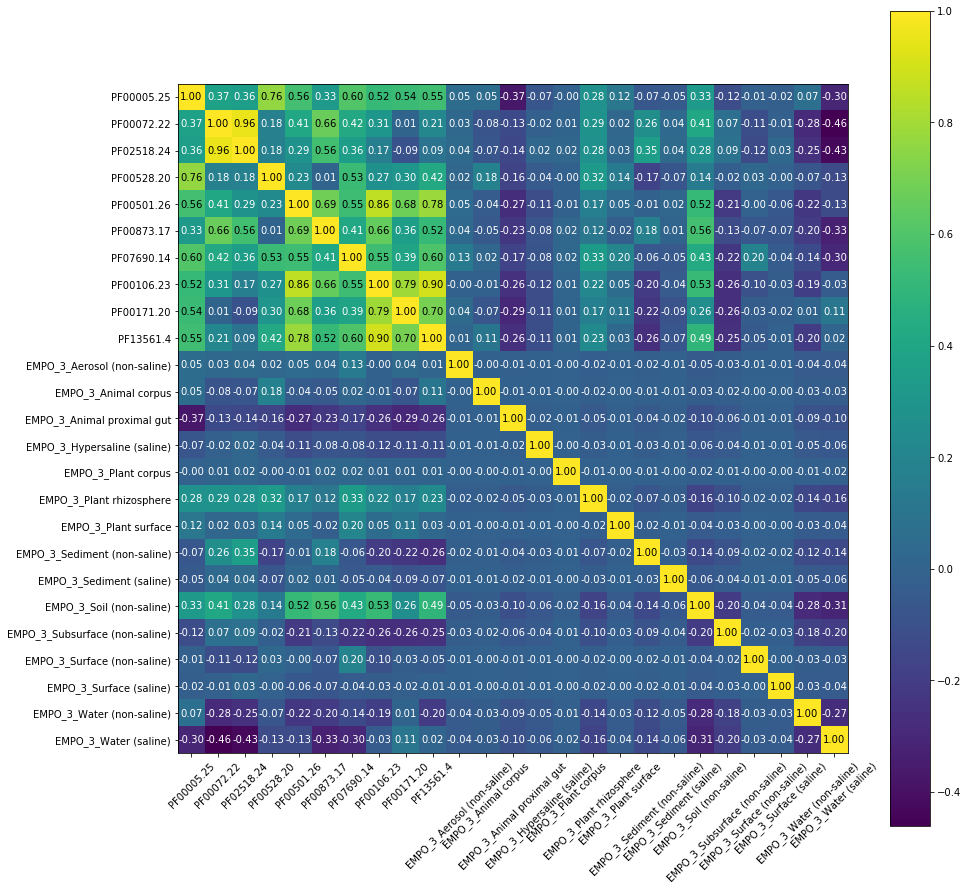

In [70]:
cm = train_vis.corr().values
hm = heatmap(
    cm,
    row_names=train_vis.columns,
    column_names=train_vis.columns,
    figsize=(15, 15)
)
